This example gives comparison on several different peak searching algorithms.

This example includes:
- Comparison of Smoothing algorithms;
- Comparison of Stripping algorithms;
- Comparison of Peak Searching algorithms;
- Comparison of Area Calculation algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gamspec.operators.Smoother as Smoother
import gamspec.operators.PeakSearcher as PeakSearcher
import gamspec.operators.AreaCalculator as AreaCalculator
import gamspec.operators.BasicOperator as BasicOperator
import gamspec.operators.OtherOperator as OtherOperator

from gamspec.Operator import Pipe, PipeNet
from gamspec.Spectrum import Spectrum, SimulatedSpectrum, simuspecs

dict_keys(['simple', 'double_slight', 'double_normal_narrow', 'double_normal', 'double_severe', 'synthesized', 'synthesized_2', 'single_peaks', 'single_peaks_bigger', 'single_peaks_biggest'])


<Axes: >

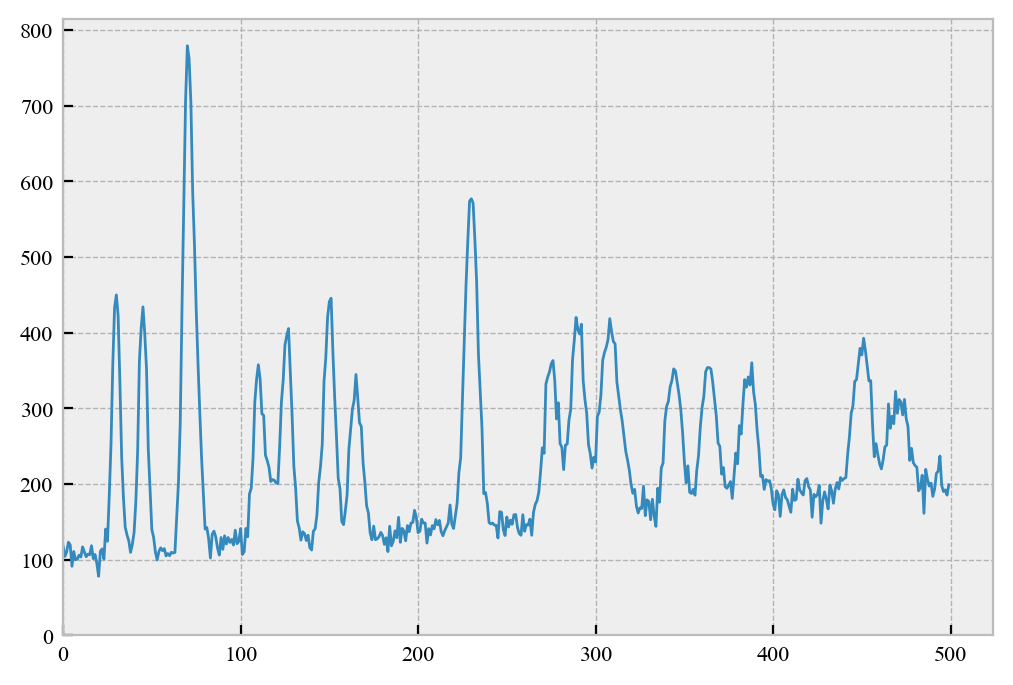

In [2]:
print(simuspecs.keys())
simulated = SimulatedSpectrum(**simuspecs['synthesized_2'])
simulated.plot()

Here, we write the codes in a more compact style.

We define three operators to perform the most basic striping object. They are wrapped into pipenet, but they can also be executed using plain commands. Then we get the output spectrum in Node 2 since minus_flow accepts two spectra in Node 1 and calcualtes their difference to Node 2.

In [7]:
from gamspec import Flow, Pipe
from gamspec.operators.BasicOperator import Passer

cen = Smoother.CentroidSmoother(3)
strp = OtherOperator.SNIPStripper(10)
minus = BasicOperator.Stripper()

smooth_flow = Flow(Pipe([cen, cen]), 0, 0, 1, 0)
strip_flow = Flow(Pipe([cen, cen, strp]), 0, 0, 1, 1)
minus_flow = Flow(minus, 1, [0, 1], 2, 0)

net = PipeNet([smooth_flow, strip_flow, minus_flow])

net([simulated])

output = net.get_node(2)[0]

GAMUT: Start running PipeNet
|Execute: Node 0|[0] >> Pipe >> Node 1|[0]
|Execute: Node 0|[0] >> Pipe >> Node 1|[1]
|Execute: Node 1|[0, 1] >> Stripper >> Node 2|[0]


We then define three different peaksearcher and to see their compacity difference.

e:\Gamut_dev\gamspec\operators\PeakSearcher.py:205: RuntimeWarning: divide by zero encountered in divide
  weight = 1 / windowed_spectrum
e:\Gamut_dev\gamspec\operators\PeakSearcher.py:212: RuntimeWarning: invalid value encountered in scalar subtract
  variance = sum(weight)*sum(weight*shape**2)-sum(weight*shape)**2
e:\Gamut_dev\gamspec\operators\PeakSearcher.py:214: RuntimeWarning: invalid value encountered in multiply
  covariance = sum(weight)*sum(weight*shape*windowed_spectrum)-sum(weight*windowed_spectrum)*sum(weight*shape)


Spectrum[synthesized_multiplets>>Pipe|Pipe|Stripper|GaussPeakSearcher[O2]]
Spectrum[synthesized_multiplets>>Pipe|Pipe|Stripper|DifferentialPeakSearcher[O4]]
Spectrum[synthesized_multiplets>>Pipe|Pipe|Stripper|CovarianceSearcher[F3]]


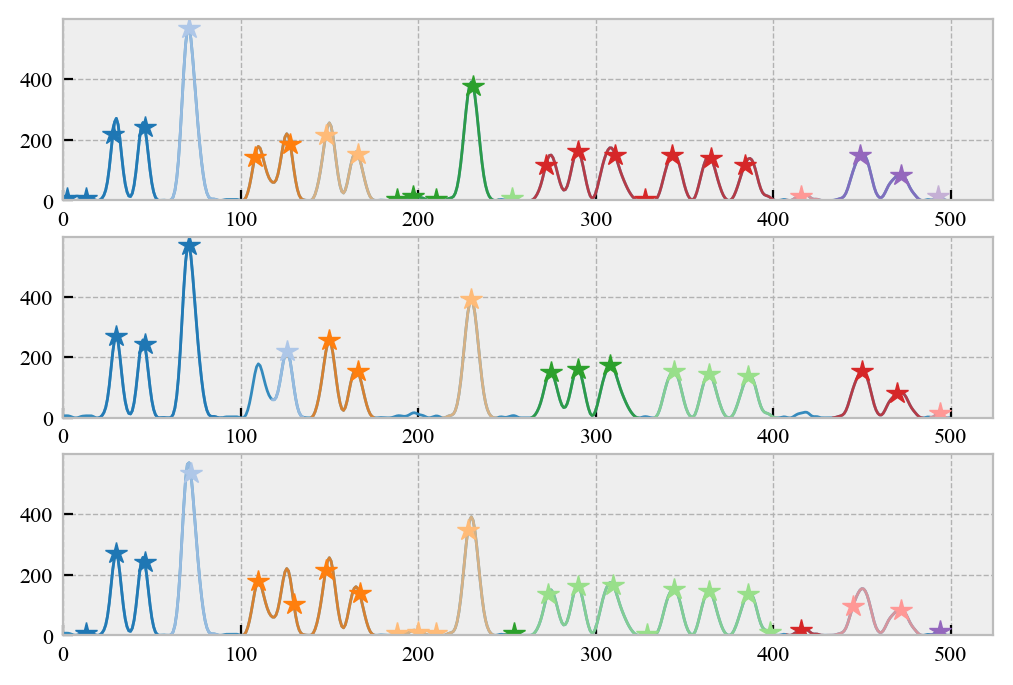

In [8]:

diff = PeakSearcher.DifferentialPeakSearcher(4, 3, 1, 2, 0.4)
gauss = PeakSearcher.GaussPeakSearcher(2, 0.05)
cov = PeakSearcher.CovarianceSearcher(2, 3)


gaussspe = gauss(output)
diffspe = diff(output)
covspe = cov(output)

fig, axe = plt.subplots(3, 1)
for i, spec in enumerate([gaussspe, diffspe, covspe]):
    spec.plot(axes=axe[i])
    spec.plot_regions(axes=axe[i])
    print(spec)